### Importing Libraries

In [2]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings as wg
wg.filterwarnings("ignore")

In [4]:
%run ./key.ipynb

### Connecting to jump server of twitter

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_sec)

### Connecting jump server to web server of twitter

In [6]:
auth.set_access_token(access_token,access_token_sec)

### Connecting to API Strong Server of Twitter

In [7]:
api = tweepy.API(auth)

In [8]:
keyword = input("Keyword you need analysis on : ")

Keyword you need analysis on : Nifty50


In [9]:
no_of_tweets = 1000
tweets = []
likes = []
time = []
for i in tweepy.Cursor( api.search_tweets,q=keyword, tweet_mode = "extended").items(no_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [10]:
df=pd.DataFrame({'tweets': tweets, 'likes':likes,'time':time})
df

,tweets,likes,time
0,"RT @stockaficionado: ITC hits a new 52W high, ...",0,2022-07-05 13:02:07+00:00
1,Here is a mid-morning market update for you.\n...,0,2022-07-05 13:01:59+00:00
2,#NYMEX #US CRUDE OIL future head shoulder patt...,0,2022-07-05 13:01:36+00:00
3,RT @option_kontrol: #OptionsTrading #intradayt...,0,2022-07-05 12:59:41+00:00
4,"ITC hits a new 52W high, up 7.5%!!\n\n#itc #ni...",0,2022-07-05 12:58:36+00:00
...,...,...,...
995,🎁 ONGC \n\n➡️ENTRY-127.80\n\n☑️ TARGET-132-137...,0,2022-07-05 05:42:53+00:00
996,#Nifty near again to sweet 1️⃣6️⃣0️⃣0️⃣0️⃣. Ca...,3,2022-07-05 05:41:57+00:00
997,RT @research_head: NIFTY @75MIN CHART VIEW📊 \n...,0,2022-07-05 05:41:40+00:00
998,"DRIVERS,,, cautious bump ahead\n\ntake care\n#...",1,2022-07-05 05:41:26+00:00


### Cleaning tweets

In [11]:
import re
def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+" , '', text)        #remove @mentions
    text = re.sub(r'#', '', text)                     #removing "#" symbol
    text = re.sub(r'RT[\s]+', '', text)               # removing RT(retweets)
    text = re.sub(r'https?:\/\/\S+', '', text)        # remove the hyper link
    return text
df["tweets"]=df["tweets"].apply(cleanTxt)
df

,tweets,likes,time
0,": ITC hits a new 52W high, up 7.5%!!\n\nitc ni...",0,2022-07-05 13:02:07+00:00
1,Here is a mid-morning market update for you.\n...,0,2022-07-05 13:01:59+00:00
2,NYMEX US CRUDE OIL future head shoulder patter...,0,2022-07-05 13:01:36+00:00
3,_kontrol: OptionsTrading intradaytrading Stock...,0,2022-07-05 12:59:41+00:00
4,"ITC hits a new 52W high, up 7.5%!!\n\nitc nift...",0,2022-07-05 12:58:36+00:00
...,...,...,...
995,🎁 ONGC \n\n➡️ENTRY-127.80\n\n☑️ TARGET-132-137...,0,2022-07-05 05:42:53+00:00
996,Nifty near again to sweet 1️⃣6️⃣0️⃣0️⃣0️⃣. Can...,3,2022-07-05 05:41:57+00:00
997,_head: NIFTY CHAVIEW📊 \n\n15503 ==&gt; 15999+...,0,2022-07-05 05:41:40+00:00
998,"DRIVERS,,, cautious bump ahead\n\ntake care\nn...",1,2022-07-05 05:41:26+00:00


In [12]:
mostlike = df.loc[df.likes.nlargest(10).index]
mostlike

,tweets,likes,time
869,nifty50 NiftyBank NIFTYMETAL NIFTYIT,53,2022-07-05 06:35:25+00:00
942,"Nifty50 is in a pattern, derivative traders sh...",41,2022-07-05 06:07:35+00:00
461,Predicted at 1:43 pm that data looks bearish a...,36,2022-07-05 09:56:12+00:00
207,Market Update for the day. \nSee more&gt; \n ...,34,2022-07-05 11:13:38+00:00
513,DXY may not create more panic now.\nNifty50 is...,32,2022-07-05 09:39:06+00:00
613,nifty50\nKhel gaya lollypop deke,24,2022-07-05 08:46:16+00:00
761,Nifty50 (in Real Value) didn't break March 202...,23,2022-07-05 07:24:16+00:00
863,Double Ingress and Bayers Date worked again..\...,23,2022-07-05 06:38:52+00:00
790,Nifty50 has gradually rallied +700Pts and Bank...,20,2022-07-05 07:15:16+00:00
840,Today's profit 80K👍👍\nThanks to 🙏🙏\n\nInvestm...,20,2022-07-05 06:49:09+00:00


In [13]:
from textblob import TextBlob

### Creating a function to get subjectivity

In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity             

### Creating  a function to get the polarity

In [15]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

##### Creating two new columns for getting subjectivity and polarity

In [16]:
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df

,tweets,likes,time,Subjectivity,Polarity
0,": ITC hits a new 52W high, up 7.5%!!\n\nitc ni...",0,2022-07-05 13:02:07+00:00,0.497273,0.193182
1,Here is a mid-morning market update for you.\n...,0,2022-07-05 13:01:59+00:00,0.500000,0.000000
2,NYMEX US CRUDE OIL future head shoulder patter...,0,2022-07-05 13:01:36+00:00,0.562500,-0.350000
3,_kontrol: OptionsTrading intradaytrading Stock...,0,2022-07-05 12:59:41+00:00,1.000000,0.976562
4,"ITC hits a new 52W high, up 7.5%!!\n\nitc nift...",0,2022-07-05 12:58:36+00:00,0.497273,0.193182
...,...,...,...,...,...
995,🎁 ONGC \n\n➡️ENTRY-127.80\n\n☑️ TARGET-132-137...,0,2022-07-05 05:42:53+00:00,0.000000,0.000000
996,Nifty near again to sweet 1️⃣6️⃣0️⃣0️⃣0️⃣. Can...,3,2022-07-05 05:41:57+00:00,0.318750,0.112500
997,_head: NIFTY CHAVIEW📊 \n\n15503 ==&gt; 15999+...,0,2022-07-05 05:41:40+00:00,0.000000,0.000000
998,"DRIVERS,,, cautious bump ahead\n\ntake care\nn...",1,2022-07-05 05:41:26+00:00,0.000000,0.000000


### Creating  a function to compute the positive , negative and neutral analysis

In [17]:
def getAnalysis(score):
    if score>0:
        return 'Positive'
    elif score == 0 :
        return 'Neutral'
    else:
        return 'Negative'
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,tweets,likes,time,Subjectivity,Polarity,Analysis
0,": ITC hits a new 52W high, up 7.5%!!\n\nitc ni...",0,2022-07-05 13:02:07+00:00,0.497273,0.193182,Positive
1,Here is a mid-morning market update for you.\n...,0,2022-07-05 13:01:59+00:00,0.500000,0.000000,Neutral
2,NYMEX US CRUDE OIL future head shoulder patter...,0,2022-07-05 13:01:36+00:00,0.562500,-0.350000,Negative
3,_kontrol: OptionsTrading intradaytrading Stock...,0,2022-07-05 12:59:41+00:00,1.000000,0.976562,Positive
4,"ITC hits a new 52W high, up 7.5%!!\n\nitc nift...",0,2022-07-05 12:58:36+00:00,0.497273,0.193182,Positive
...,...,...,...,...,...,...
995,🎁 ONGC \n\n➡️ENTRY-127.80\n\n☑️ TARGET-132-137...,0,2022-07-05 05:42:53+00:00,0.000000,0.000000,Neutral
996,Nifty near again to sweet 1️⃣6️⃣0️⃣0️⃣0️⃣. Can...,3,2022-07-05 05:41:57+00:00,0.318750,0.112500,Positive
997,_head: NIFTY CHAVIEW📊 \n\n15503 ==&gt; 15999+...,0,2022-07-05 05:41:40+00:00,0.000000,0.000000,Neutral
998,"DRIVERS,,, cautious bump ahead\n\ntake care\nn...",1,2022-07-05 05:41:26+00:00,0.000000,0.000000,Neutral


### Ploting the polarity and subjectivity

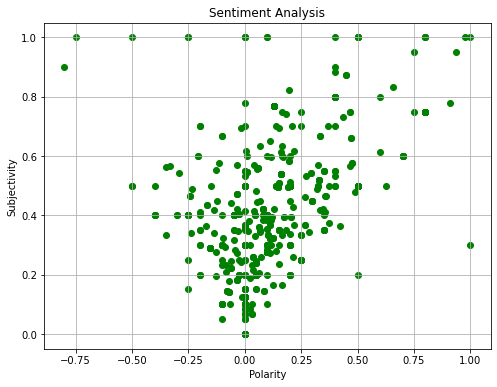

In [18]:
plt.figure(figsize=(8,6))
for i in range (0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

### Showing the value count

In [19]:
df['Analysis'].value_counts()

Positive    452
Neutral     428
Negative    120
Name: Analysis, dtype: int64

### Ploting and Visualizing the value count

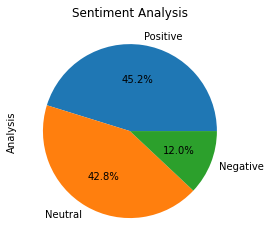

In [20]:
plt.title('Sentiment Analysis')
df['Analysis'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()